## Restaurant Orders Project -

### Exploratory Data Analysis

In [5]:
import pandas as pd

In [53]:
df_menu = pd.read_csv('./Data/menu_items.csv')
df_orders = pd.read_csv('./Data/order_details.csv')
# Top ten results
df_orders.head(10)

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0
5,6,2,1/1/23,11:57:40 AM,106.0
6,7,3,1/1/23,12:12:28 PM,117.0
7,8,3,1/1/23,12:12:28 PM,119.0
8,9,4,1/1/23,12:16:31 PM,117.0
9,10,5,1/1/23,12:21:30 PM,117.0


<b>Below is the code for combining the order_date and order_time columns so that there is date timestamp column.<b>

In [57]:
order_timestamp = pd.to_datetime(df_orders["order_date"] + " " + df_orders["order_time"], format="%m/%d/%y %I:%M:%S %p")

In [59]:
df_orders.insert(0, "order_timestamp", order_timestamp)

In [63]:
df_orders = df_orders.drop(["order_date", "order_time"], axis= 1)

In [67]:
# order_date and order_time has to be combined into a timestamp
# order_timestamp was created with the combined columns
df_orders.head()

,order_timestamp,order_details_id,order_id,item_id
0,2023-01-01 11:38:36,1,1,109.0
1,2023-01-01 11:57:40,2,2,108.0
2,2023-01-01 11:57:40,3,2,124.0
3,2023-01-01 11:57:40,4,2,117.0
4,2023-01-01 11:57:40,5,2,129.0


<b>Timestamp column is now datetime64 Dtype. item_id is the only float column. <b>

In [69]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_timestamp   12234 non-null  datetime64[ns]
 1   order_details_id  12234 non-null  int64         
 2   order_id          12234 non-null  int64         
 3   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 382.4 KB


### Cleaning Up Missing Rows
<b> Data that is null is being deleted with the .dropna() function. <b>

In [71]:
# Overwriting current data frame to remove the na's/missing data.
df_orders = df_orders.dropna()
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_timestamp   12097 non-null  datetime64[ns]
 1   order_details_id  12097 non-null  int64         
 2   order_id          12097 non-null  int64         
 3   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 472.5 KB


#### Analyzing the menu dataset.

In [73]:
df_menu.head(10)

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00
5,106,French Fries,American,7.00
6,107,Orange Chicken,Asian,16.50
7,108,Tofu Pad Thai,Asian,14.50
8,109,Korean Beef Bowl,Asian,17.95
9,110,Pork Ramen,Asian,17.95


In [75]:
df_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


#### Merging both data files into a combined file with a .merge() function.

In [77]:
df_order_items = df_orders.merge(df_menu, how='left', left_on='item_id', right_on='menu_item_id').drop('menu_item_id', axis=1)

df_order_items.head()

,order_timestamp,order_details_id,order_id,item_id,item_name,category,price
0,2023-01-01 11:38:36,1,1,109.0,Korean Beef Bowl,Asian,17.95
1,2023-01-01 11:57:40,2,2,108.0,Tofu Pad Thai,Asian,14.50
2,2023-01-01 11:57:40,3,2,124.0,Spaghetti,Italian,14.50
3,2023-01-01 11:57:40,4,2,117.0,Chicken Burrito,Mexican,12.95
4,2023-01-01 11:57:40,5,2,129.0,Mushroom Ravioli,Italian,15.50


### Adding Tax & Total Revenue Columns

In [82]:
df_order_items['sales_tax'] = (df_order_items.price * .08).round(2)
df_order_items['total_revenue'] = df_order_items.price + df_order_items.sales_tax

df_order_items.head()

,order_timestamp,order_details_id,order_id,item_id,item_name,category,price,sales tax,sales_tax,total_revenue
0,2023-01-01 11:38:36,1,1,109.0,Korean Beef Bowl,Asian,17.95,1.44,1.44,19.39
1,2023-01-01 11:57:40,2,2,108.0,Tofu Pad Thai,Asian,14.50,1.16,1.16,15.66
2,2023-01-01 11:57:40,3,2,124.0,Spaghetti,Italian,14.50,1.16,1.16,15.66
3,2023-01-01 11:57:40,4,2,117.0,Chicken Burrito,Mexican,12.95,1.04,1.04,13.99
4,2023-01-01 11:57:40,5,2,129.0,Mushroom Ravioli,Italian,15.50,1.24,1.24,16.74


In [84]:
df_order_items.describe()

,order_timestamp,order_details_id,order_id,item_id,price,sales tax,sales_tax,total_revenue
count,12097,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000
mean,2023-02-15 03:39:53.237000960,6118.950897,2692.569149,115.202282,13.161767,1.055128,1.055128,14.216895
min,2023-01-01 11:38:36,1.000000,1.000000,101.000000,5.000000,0.400000,0.400000,5.400000
25%,2023-01-23 16:21:26,3064.000000,1353.000000,107.000000,10.500000,0.840000,0.840000,11.340000
50%,2023-02-14 20:00:33,6119.000000,2711.000000,114.000000,13.950000,1.120000,1.120000,15.070000
75%,2023-03-09 15:30:34,9175.000000,4020.000000,123.000000,16.500000,1.320000,1.320000,17.820000
max,2023-03-31 22:15:48,12234.000000,5370.000000,132.000000,19.950000,1.600000,1.600000,21.550000
std,NaN,3531.337208,1545.826452,9.387580,3.986392,0.320078,0.320078,4.306466


### Analyzing Best & Worst Selling Items

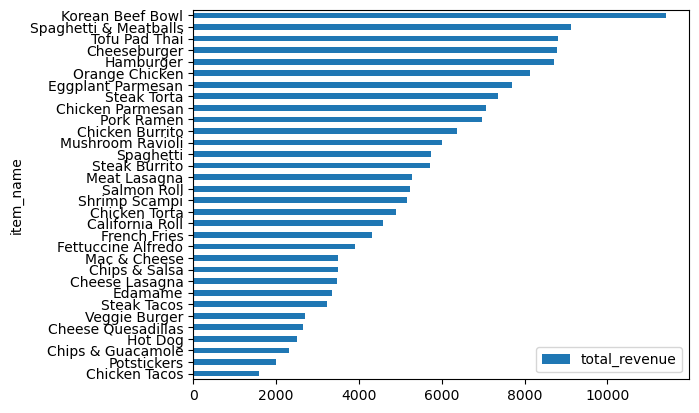

In [204]:
(df_order_items
 .groupby('item_name')
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
);

#### The Korean Beek Bowl meal has the highest revenue of all of the items on the menu.

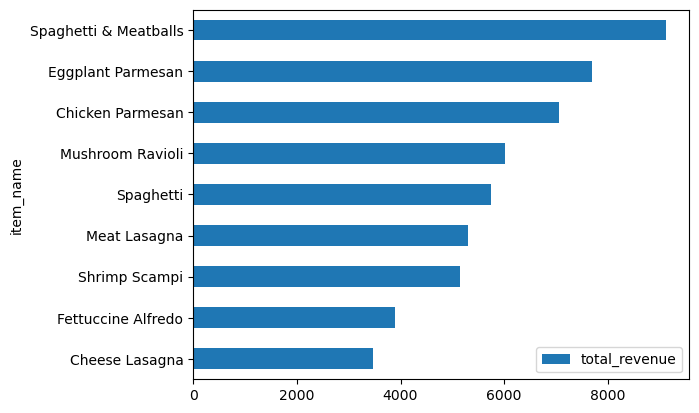

In [97]:
(df_order_items
 .query("category == 'Italian'")
 .groupby('item_name')
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
);

#### Spaghetti & Meatballs is the most popular Italian dish by total_revenue.

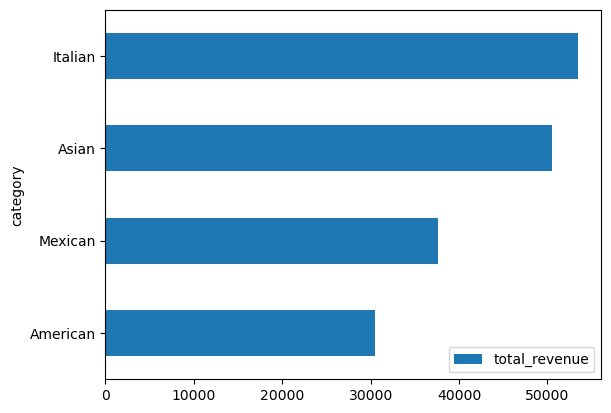

In [144]:
(df_order_items
 .groupby('category')
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
);

#### Italian food edges out Asian food for most popular food category measured by total_revenue.

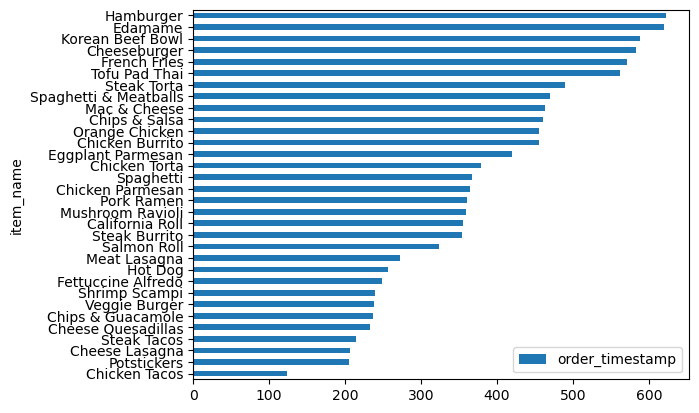

In [198]:
(df_order_items
 .groupby('item_name')
 .agg({"order_timestamp":"count"})
 .sort_values(by="order_timestamp")
 .plot
 .barh()
);

#### Based on the most ordered items, the Hamburger and the Edamame was ordered the most times at a little over 600 times. 

In [ ]:
(df_order_items
 .groupby('item_name')
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
);

### Analyzing Busiest Times

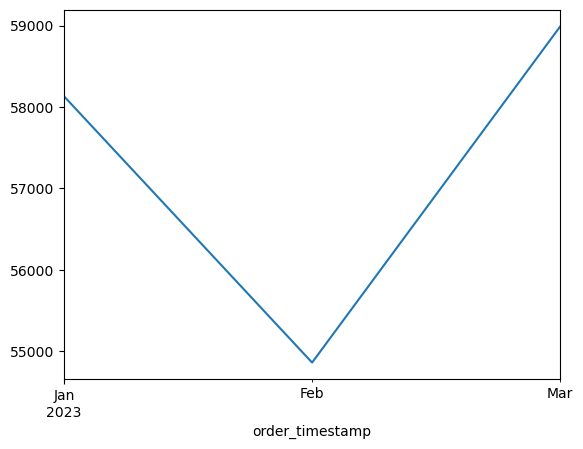

In [111]:
df_order_items.set_index('order_timestamp').resample('ME')['total_revenue'].sum().plot(); 

#### March and January had strong months for total revenue. February was a difficult month for sales.

In [115]:
df_order_items['dayofweek'] = df_order_items.order_timestamp.dt.dayofweek
df_order_items['hour'] = df_order_items.order_timestamp.dt.hour

df_order_items.head()

,order_timestamp,order_details_id,order_id,item_id,item_name,category,price,sales tax,sales_tax,total_revenue,dayofweek,hour
0,2023-01-01 11:38:36,1,1,109.0,Korean Beef Bowl,Asian,17.95,1.44,1.44,19.39,6,11
1,2023-01-01 11:57:40,2,2,108.0,Tofu Pad Thai,Asian,14.50,1.16,1.16,15.66,6,11
2,2023-01-01 11:57:40,3,2,124.0,Spaghetti,Italian,14.50,1.16,1.16,15.66,6,11
3,2023-01-01 11:57:40,4,2,117.0,Chicken Burrito,Mexican,12.95,1.04,1.04,13.99,6,11
4,2023-01-01 11:57:40,5,2,129.0,Mushroom Ravioli,Italian,15.50,1.24,1.24,16.74,6,11


### Charts Analyzing the Data

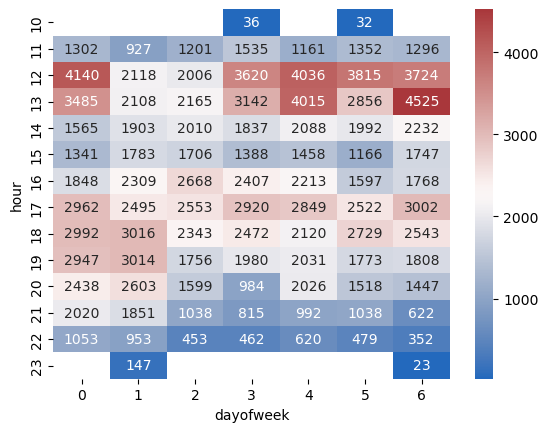

In [133]:
import seaborn as sns

sns.heatmap(
    df_order_items.pivot_table(
        index='hour',
        columns='dayofweek',
        values='total_revenue',
        aggfunc='sum'
    ).round(),
    annot=True,
    fmt='g',
    cmap='vlag'
);    
    

##### Chart Information:
* In the chart above, 0 = Monday and 6 = Sunday.
* The time is military time. So 20 = 8PM, 21 = 9PM, 22 = 10PM, 23 = 11PM. 

##### Analysis of the Day of the week chart:
* The results of this pivot table shows the busiest hours of the restaurant is at 12PM & 1PM during lunch hours.
* The slowest hours of the restaurant are at 9 to 11 at night, which suggest closing by at least 10 would save the restuarant owner some money.

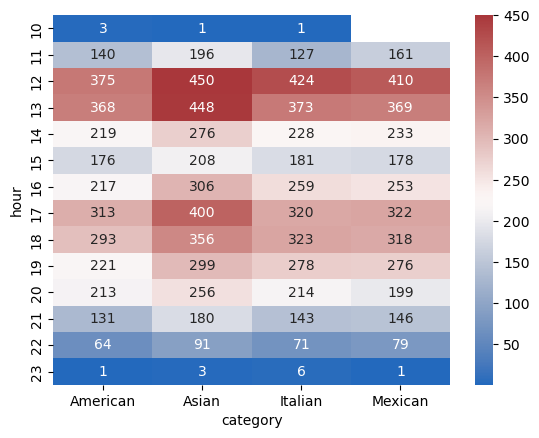

In [142]:
sns.heatmap(
    df_order_items.pivot_table(
        index='hour',
        columns='category',
        values='item_name',
        aggfunc='count'
    ).round(),
    annot=True,
    fmt='g',
    cmap='vlag'
);    

#### This chart shows that customers order Asian food the most. However, the most orders does not mean the most revenue in this case.

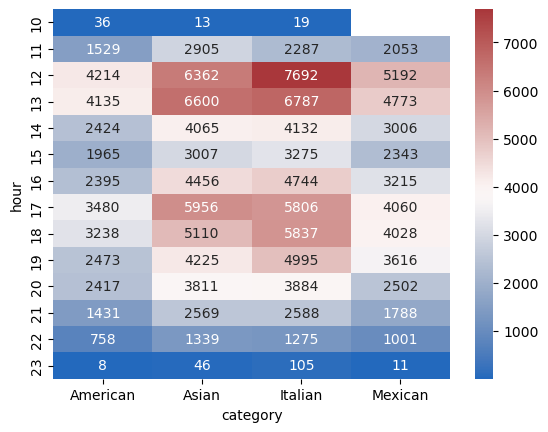

In [154]:
sns.heatmap(
    df_order_items.pivot_table(
        index='hour',
        columns='category',
        values='total_revenue',
        aggfunc='sum'
    ).round(),
    annot=True,
    fmt='g',
    cmap='vlag'
);    

#### This revenue by hour chart shows that Itailian food gets the most revenue compared to the other categories even though Asian food gets the most ordered by customers. 

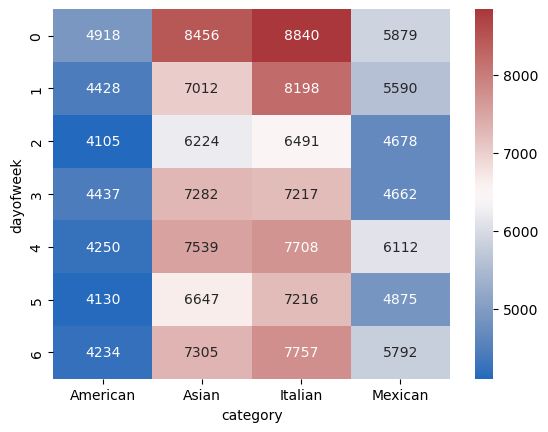

In [178]:
sns.heatmap(
    df_order_items.pivot_table(
        index='dayofweek',
        columns='category',
        values='total_revenue',
        aggfunc='sum'
    ).round(),
    annot=True,
    fmt='g',
    cmap='vlag'
);    

#### Monday is the best sales day, and Wednesday is the worst sales day for the restaurant with the dayofweek analysis.

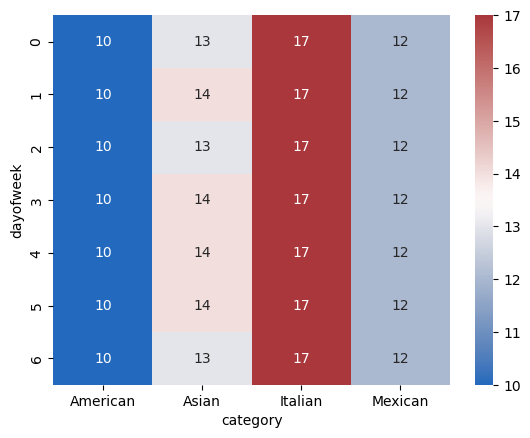

In [162]:
sns.heatmap(
    df_order_items.pivot_table(
        index='dayofweek',
        columns='category',
        values='price',
        aggfunc='mean'
    ).round(),
    annot=True,
    fmt='g',
    cmap='vlag'
);    

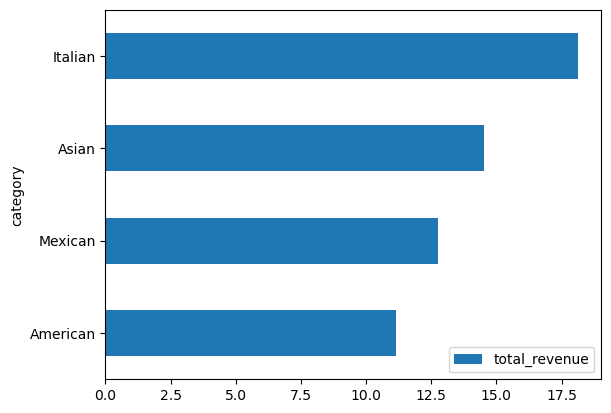

In [176]:
(df_order_items
 .groupby('category')
 .agg({"total_revenue":"mean"})
 .sort_values("total_revenue")
 .plot
 .barh()
);

#### The heatmap and the horizontal chart shows that Italian food is priced higher than Asian food. 
<b> So the Italian food most likely costs more to make considering the ingredients and food involved to make the Italian dishes. Asian food is priced lower than Italian food, but most likely cost less to make than Italian food. (Please note the cost of goods was not provided in the dataset, so I am just making assumptions on Italian food costing more to help explain why it is priced higher than Asian food. <b>

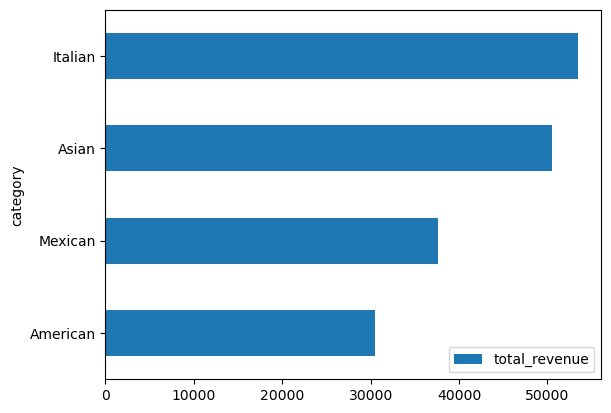

In [202]:
(df_order_items
 .groupby('category')
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
);

#### Data Limitations - 
<b> Even though Itailian food has the highest total revenues, I would need a cost of goods column in order to figure out the profit of the dishes and the food categories to truly know what are the most profitable items. However, I do suspect that Asian food is more profitable the rest of the food categories.<b>

## Conclusions - 
#### My recommendations for the restaurant would be:
* Close the resturant at least by 10, since that 10PM to 11PM hour is one of the slowest times for the restuarant.
* Cut the five items with the lowest revenue such as chicken tacos and potstickers.
* Add a few more Asian dishes to the menu since Asian food is popular at this restuarant location and is more reasonably priced than Italian food for the customers.